In [14]:
application = 'Watercare'

In [1]:
%matplotlib inline

In [5]:
import pathlib

In [2]:
from matplotlib import pyplot as plt 

In [3]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
HOME = pathlib.Path.home()

In [21]:
varname = 'RAIN_BC'
stat = 'mean'

In [18]:
dpath = HOME.joinpath(f"research/Smart_Ideas/outputs/targets/application_cases/{application}/{varname}")

In [19]:
lfiles = list(dpath.glob("*.csv"))

In [24]:
data = pd.read_csv(dpath.joinpath(f"daily_{stat}_{varname}.csv"), index_col=0, parse_dates=True)

<AxesSubplot:xlabel='time'>

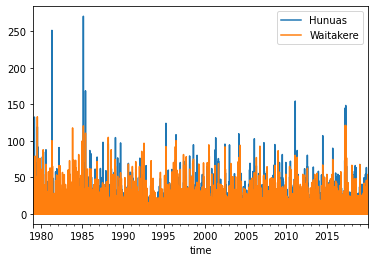

In [26]:
data.plot()

### threshold in mm 

In [46]:
thresh = 20

In [47]:
df = data.where((data >= 20))

In [48]:
df = df.where(df.isnull(), 1)

In [49]:
df.sum()

Hunuas       1027.0
Waitakere    1007.0
dtype: float64

### number of days per month above the threshold

In [51]:
df_m = df.resample('1M').sum()

In [52]:
df_m

,Hunuas,Waitakere
time,,
1979-01-31,0.0,0.0
1979-02-28,3.0,5.0
1979-03-31,3.0,4.0
1979-04-30,1.0,4.0
1979-05-31,2.0,3.0
...,...,...
2019-08-31,3.0,1.0
2019-09-30,4.0,4.0
2019-10-31,2.0,1.0


In [53]:
df_m.index.days_in_month

Int64Index([31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
            ...
            31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
           dtype='int64', name='time', length=492)

In [54]:
df_m.loc[:,'ndays'] = df_m.index.days_in_month 

In [55]:
df_m

,Hunuas,Waitakere,ndays
time,,,
1979-01-31,0.0,0.0,31
1979-02-28,3.0,5.0,28
1979-03-31,3.0,4.0,31
1979-04-30,1.0,4.0,30
1979-05-31,2.0,3.0,31
...,...,...,...
2019-08-31,3.0,1.0,31
2019-09-30,4.0,4.0,30
2019-10-31,2.0,1.0,31


### 3 months rolling accumulation 

In [58]:
df_s = df_m.rolling(window=3, min_periods=3).sum()

<AxesSubplot:xlabel='time'>

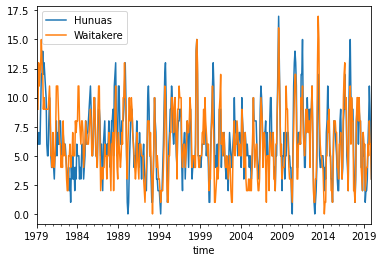

In [61]:
df_s.iloc[:,:-1].plot()

In [64]:
df_s

,Hunuas,Waitakere,ndays
time,,,
1979-01-31,NaN,NaN,NaN
1979-02-28,NaN,NaN,NaN
1979-03-31,6.0,9.0,90.0
1979-04-30,7.0,13.0,89.0
1979-05-31,6.0,11.0,92.0
...,...,...,...
2019-08-31,8.0,5.0,92.0
2019-09-30,11.0,8.0,92.0
2019-10-31,9.0,6.0,92.0
